### Importing required libraries and the data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

In [3]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")


In [4]:
print(len(leads_data))


9240


In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

### Let's understand the structure of our dataframe

In [6]:
# Let's see the head of our dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation

In [8]:
#check if any rows have all unique
for i in leads_data.columns:
    print(i,': ', len(set(leads_data[i])))

Prospect ID :  9240
Lead Number :  9240
Lead Origin :  5
Lead Source :  22
Do Not Email :  2
Do Not Call :  2
Converted :  2
TotalVisits :  178
Total Time Spent on Website :  1731
Page Views Per Visit :  251
Last Activity :  18
Country :  39
Specialization :  20
How did you hear about X Education :  11
What is your current occupation :  7
What matters most to you in choosing a course :  4
Search :  2
Magazine :  1
Newspaper Article :  2
X Education Forums :  2
Newspaper :  2
Digital Advertisement :  2
Through Recommendations :  2
Receive More Updates About Our Courses :  1
Tags :  27
Lead Quality :  6
Update me on Supply Chain Content :  1
Get updates on DM Content :  1
Lead Profile :  7
City :  8
Asymmetrique Activity Index :  4
Asymmetrique Profile Index :  4
Asymmetrique Activity Score :  4230
Asymmetrique Profile Score :  4228
I agree to pay the amount through cheque :  1
A free copy of Mastering The Interview :  2
Last Notable Activity :  16


In [9]:
#remove Lead Number and Prospect ID as they only have unique values which may not  be  useful  for the predictions
leads_data.drop(['Lead Number', 'Prospect ID'], axis=1, inplace = True)

In [10]:
leads_data.info() #checking the null objects present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation                  6550

In [11]:
# Columns with missing values:
# TotalVisits                                      9103 non-null float64 # median can be assigned or drop
# Page Views Per Visit                             9103 non-null float64 # median can be assigned or drop
# Last Activity                                    9137 non-null object # Can remove the missing  rows(less data lost) or assgn nan as a new dummy
# Country                                          6779 non-null object # can assign nan as a new dummy variable / with a suitable category from the the present categories
# Specialization                                   7802 non-null object # can assign nan as a new dummy variable / with a suitable category from the the present categories
# How did you hear about X Education               7033 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# What is your current occupation                  6550 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# What matters most to you in choosing a course    6531 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# Tags                                             5887 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# Lead Quality                                     4473 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# Lead Profile                                     6531 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# City                                             7820 non-null object # can assign nan as a  new dummy variable/ with a suitable category from the the present categories
# Asymmetrique Activity Index                      5022 non-null object
# Asymmetrique Profile Index                       5022 non-null object
# Asymmetrique Activity Score                      5022 non-null float64 # Assymetrique variables are the indexes given based on the customer activity and profile. So these may be correlated
# Asymmetrique Profile Score                       5022 non-null float64 # with other variables and also have a lot of nan values. So, these are removed.



In [12]:
#drop nan values of totalVisits and pages views per visit
leads_data.dropna(subset=['TotalVisits','Page Views Per Visit'], how='all', inplace = True)
leads_data.shape

(9103, 35)

In [13]:
# replace the categorical variable with a different variable to treat it as a dummy
na_categorical_var = {'Country':'Other', 'Specialization':'Select', 'How did you hear about X Education':'Other',
                      'What is your current occupation':'Other', 'What matters most to you in choosing a course':'Other',
                      'Tags':'number not provided','Lead Quality':'Not Sure', 'Lead Profile':'Select','City':'Select'}

In [14]:
leads_data = leads_data.fillna(value=na_categorical_var) # filling the nan values. These will be treated as a seperate dummy variable. 

In [15]:
leads_data.info() # checking for null values again.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 35 columns):
Lead Origin                                      9103 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9103 non-null object
Do Not Call                                      9103 non-null object
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9103 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9103 non-null object
Country                                          9103 non-null object
Specialization                                   9103 non-null object
How did you hear about X Education               9103 non-null object
What is your current occupation                  9103

In [16]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
# Converting Yes to 1 and No to 0

leads_data['Do Not Email'] = leads_data['Do Not Email'].map({'Yes': 1, 'No': 0})
leads_data['Do Not Call'] = leads_data['Do Not Call'].map({'Yes': 1, 'No': 0})
leads_data['Search'] = leads_data['Search'].map({'Yes': 1, 'No': 0})
leads_data['Magazine'] = leads_data['Magazine'].map({'Yes': 1, 'No': 0})
leads_data['Newspaper Article'] = leads_data['Newspaper Article'].map({'Yes': 1, 'No': 0})
leads_data['X Education Forums'] = leads_data['X Education Forums'].map({'Yes': 1, 'No': 0})
leads_data['Newspaper'] = leads_data['Newspaper'].map({'Yes': 1, 'No': 0})
leads_data['Digital Advertisement'] = leads_data['Digital Advertisement'].map({'Yes': 1, 'No': 0})
leads_data['Through Recommendations'] = leads_data['Through Recommendations'].map({'Yes': 1, 'No': 0})
leads_data['Receive More Updates About Our Courses'] = leads_data['Receive More Updates About Our Courses'].map({'Yes': 1, 'No': 0})
leads_data['Update me on Supply Chain Content'] = leads_data['Update me on Supply Chain Content'].map({'Yes': 1, 'No': 0})
leads_data['Get updates on DM Content'] = leads_data['Get updates on DM Content'].map({'Yes': 1, 'No': 0})
leads_data['I agree to pay the amount through cheque'] = leads_data['I agree to pay the amount through cheque'].map({'Yes': 1, 'No': 0})
leads_data['A free copy of Mastering The Interview'] = leads_data['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [18]:
set(leads_data['Asymmetrique Activity Index'])

{'01.High', '02.Medium', '03.Low', nan}

In [19]:
set(leads_data['Asymmetrique Profile Index'])


{'01.High', '02.Medium', '03.Low', nan}

In [20]:
leads_data['Asymmetrique Profile Index'] = leads_data['Asymmetrique Profile Index'].map({'01.High':3, '02.Medium':2, '03.Low':1})
leads_data['Asymmetrique Activity Index'] = leads_data['Asymmetrique Activity Index'].map({'01.High':3, '02.Medium':2, '03.Low':1})

In [21]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,...,0,Select,Select,2.0,2.0,15.0,15.0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,Select,Select,2.0,2.0,15.0,15.0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,Potential Lead,Mumbai,2.0,3.0,14.0,20.0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,Select,Mumbai,2.0,3.0,13.0,17.0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,Select,Mumbai,2.0,3.0,15.0,18.0,0,0,Modified


In [22]:
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Dummy Variable Creation

In [23]:

dummy_list  = ['Lead Origin', 'Lead Source','Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality','Lead Profile', 'City', 'Last Notable Activity' ]
for dummy_var  in dummy_list:
    status = pd.get_dummies(leads_data[dummy_var],prefix = dummy_var,prefix_sep ='_' ,drop_first = True)
    leads_data = pd.concat([leads_data, status], axis = 1)
    leads_data.drop([dummy_var], axis = 1, inplace = True)

In [24]:
display_all(leads_data.head().T)

,0,1,2,3,4
Do Not Email,0.0,0.0,0.0,0.0,0.0
Do Not Call,0.0,0.0,0.0,0.0,0.0
Converted,0.0,0.0,1.0,0.0,1.0
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0.0,674.0,1532.0,305.0,1428.0
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0
Search,0.0,0.0,0.0,0.0,0.0
Magazine,0.0,0.0,0.0,0.0,0.0
Newspaper Article,0.0,0.0,0.0,0.0,0.0
X Education Forums,0.0,0.0,0.0,0.0,0.0


In [25]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Columns: 188 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(6), int64(16), uint8(166)
memory usage: 3.0 MB


Now we can see we have all variables as integer.

### Checking for Outliers

In [26]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,...,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,...,0.000110,0.001538,0.359222,0.020103,0.034934,0.000110,0.238603,0.003515,0.005163,0.000110
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,...,0.010481,0.039189,0.479799,0.140361,0.183622,0.010481,0.426253,0.059189,0.071673,0.010481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1372.000000,5.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,10.000000,1556.900000,6.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,1.000000,0.000000,1.000000,17.000000,1838.960000,9.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000



From the distribution shown above, you can see that there outliner in our data. The numbers are gradually increasing. but in case of the columns 'TotalVisits' and 'Page Views Per Visit	' there is sudden jump in numbers at 99% so lets remove them


In [27]:
q = leads_data["TotalVisits"].quantile(0.99)
leads_data = leads_data[leads_data["TotalVisits"] < q]
leads_data.shape  

(9004, 188)

In [28]:
q = leads_data["Page Views Per Visit"].quantile(0.99)
leads_data = leads_data[leads_data["Page Views Per Visit"] < q]
leads_data.shape  

(8892, 188)

In [29]:
# Checking outliers at 25%,50%,75%,90%,95% and 99% again
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.0,8892.0,8892.0,...,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000
mean,0.077823,0.000225,0.379780,3.088507,476.563878,2.229871,0.001462,0.0,0.0,0.0,...,0.000112,0.001462,0.360661,0.020468,0.031601,0.000112,0.239091,0.003486,0.005173,0.000112
std,0.267908,0.014997,0.485359,2.822722,544.325819,1.837171,0.038210,0.0,0.0,0.0,...,0.010605,0.038210,0.480219,0.141602,0.174946,0.010605,0.426553,0.058945,0.071743,0.010605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.750000,1.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,239.000000,2.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,908.250000,3.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,1.000000,7.000000,1370.000000,5.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
95%,1.000000,0.000000,1.000000,8.000000,1553.000000,6.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,1.000000,0.000000,1.000000,13.000000,1837.180000,7.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


Now we see no outliers in the data

### Checking for Missing Values and Inputing Them

In [30]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Do Not Email                                           0.00
Do Not Call                                            0.00
Converted                                              0.00
TotalVisits                                            0.00
Total Time Spent on Website                            0.00
Page Views Per Visit                                   0.00
Search                                                 0.00
Magazine                                               0.00
Newspaper Article                                      0.00
X Education Forums                                     0.00
Newspaper                                              0.00
Digital Advertisement                                  0.00
Through Recommendations                                0.00
Receive More Updates About Our Courses                 0.00
Update me on Supply Chain Content                      0.00
Get updates on DM Content                              0.00
Asymmetrique Activity Index             

In [31]:
td_with = leads_data
# removing assymetrique variables as they are correlated with other variables and have high nan values.
td_without = leads_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1, inplace = False)

In [32]:
td_without.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=184)

Now we don't have any missing values

###Adding of a few derived variables

In [33]:
# we add a few derived variables which can be useful for the model's predictions

In [34]:
eps = 1e-6 # used to avoid division by 0
td_without['Total_pages'] = td_without['TotalVisits'] * td_without['Page Views Per Visit']
td_without['Total_timepervisit'] = td_without['Total Time Spent on Website'] /( td_without['TotalVisits'] + eps )
td_without['Total_timeperpage'] = td_without['Total Time Spent on Website'] / (td_without['Total_pages']+eps)



### Feature Standardisation

In [35]:
# Normalising continuous features
list_cont = ['TotalVisits',	'Total Time Spent on Website','Page Views Per Visit','Total_pages', 'Total_timepervisit', 'Total_timeperpage']
df = td_without[list_cont]

In [36]:
td_without.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums',
       ...
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked', 'Total_pages',
       'Total_timepervisit', 'Total_timeperpage'],
      dtype='object', length=187)

In [37]:
normalized_df=(df-df.mean())/df.std()
td_without = td_without.drop(list_cont, axis = 1)
td_without = pd.concat([td_without,normalized_df],axis=1)
td_without.describe()

,Do Not Email,Do Not Call,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Total_pages,Total_timepervisit,Total_timeperpage
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.0,8892.0,8892.0,8892.000000,8892.000000,8892.000000,...,8892.000000,8892.000000,8892.000000,8892.000000,8.892000e+03,8.892000e+03,8.892000e+03,8.892000e+03,8.892000e+03,8.892000e+03
mean,0.077823,0.000225,0.379780,0.001462,0.0,0.0,0.0,0.000112,0.000225,0.000675,...,0.239091,0.003486,0.005173,0.000112,1.056410e-15,-2.641212e-16,-1.033724e-15,-2.407069e-15,-2.610572e-15,2.263326e-15
std,0.267908,0.014997,0.485359,0.038210,0.0,0.0,0.0,0.010605,0.014997,0.025969,...,0.426553,0.058945,0.071743,0.010605,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.094159e+00,-8.755122e-01,-1.213752e+00,-7.803921e-01,-7.086692e-01,-4.933286e-01
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7.398910e-01,-8.686229e-01,-6.694373e-01,-7.070497e-01,-7.049247e-01,-4.919879e-01
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.135503e-02,-4.364369e-01,-1.251221e-01,-4.503513e-01,-4.034653e-01,-3.531409e-01
75%,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.229130e-01,7.930657e-01,4.191931e-01,3.930861e-01,2.840782e-01,1.949188e-02
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.574129e+00,3.298458e+00,3.140769e+00,8.607433e+00,8.636773e+00,1.192898e+01


In [38]:
td_without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 9239
Columns: 187 entries, Do Not Email to Total_timeperpage
dtypes: float64(6), int64(15), uint8(166)
memory usage: 2.9 MB


### Checking the Converted Rate

In [39]:
Converted = (sum(td_without['Converted'])/len(td_without['Converted'].index))*100
Converted


37.97795771479982

*We* have almost 38% Conversion rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [40]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = td_without.drop(['Converted'],axis=1)

# Putting response variable to y
y = td_without['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [42]:

import scipy
scipy.__version__

'1.1.0'

In [43]:
import statsmodels.api as sm

In [44]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zer

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6056
Model Family:                Binomial   Df Model:                          167
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 30 May 2019   Deviance:                          nan
Time:                        22:38:22   Pearson chi2:                 2.01e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    8.104e+15   1.08e+08    7.5e+07      0.000     8.1e+15     8.1e+15
Do Not Email                                                            -1.894e+14   4.71e+06  -4.02e+07      0.000   -1.89e+14   -1.89e+14
Do Not Call                                                              9.762e+15    4.8e+07   2.03e+08      0.000    9.76e+15    9.76e+15
Search                                                                   5.115e+14   2.47e+07   2.07e+07      0.000    5.11e+14    5.11e+14
Magazine                                                                  628.4453   5.29e-06   1.19e+08      0.000     628.445     628.445
Newspaper Article                                                        -124.3356   1.07e-06  -1.16e+08      0.000    -124.336    -124.336
X Education Forums                                                        823.8085    5.3e-06   1.56e+08      0.000     823.809     823.809
Newspaper                                                                8.101e+14   6.76e+07    1.2e+07      0.000     8.1e+14     8.1e+14
Digital Advertisement                                                   -5.896e+13   6.76e+07  -8.72e+05      0.000    -5.9e+13    -5.9e+13
Through Recommendations                                                  6.426e+15   4.02e+07    1.6e+08      0.000    6.43e+15    6.43e+15
Receive More Updates About Our Courses                                   -472.2750   3.27e-06  -1.44e+08      0.000    -472.275    -472.275
Update me on Supply Chain Content                                        -327.3347   2.37e-06  -1.38e+08      0.000    -327.335    -327.335
Get updates on DM Content                                                 737.8372   4.25e-06   1.74e+08      0.000     737.837     737.837
I agree to pay the amount through cheque                                 -473.6715   2.69e-06  -1.76e+08      0.000    -473.671    -473.671
A free copy of Mastering The Interview                                    9.27e+13   3.42e+06   2.71e+07      0.000    9.27e+13    9.27e+13
Lead Origin_Landing Page Submission                                     -1.964e+14   4.31e+06  -4.55e+07      0.000   -1.96e+14   -1.96e+14
Lead Origin_Lead Add Form                                               -5.697e+14   3.94e+07  -1.45e+07      0.000    -5.7e+14    -5.7e+14
Lead Origin_Lead Import                                                 -1.099e+16   7.83e+07   -1.4e+08      0.000    -1.1e+16    -1.1e+16
Lead Source_Direct Traffic                                              -9.746e+14   4.04e+07  -2.41e+07      0.000   -9.75e+14   -9.75e+14
Lead Source_Facebook                                                     9.545e+15

### Correlation Matrix

In [45]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

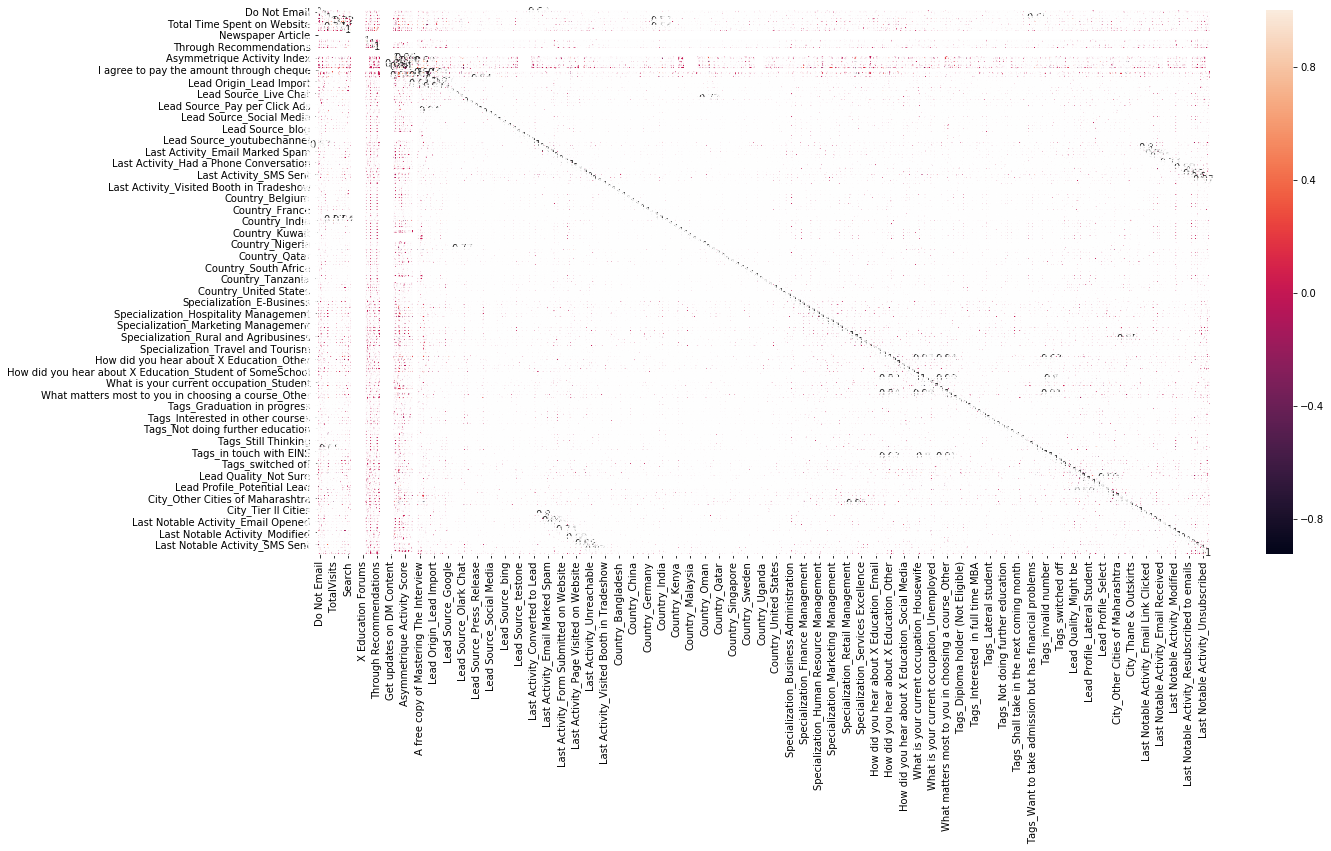

In [46]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)

### Feature Selection Using RFE

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True False False False False False
 False  True  True False False False  True False False False False  True
 False  True  True False  True  True False False False  True  True False
 False False False False False False False False Fa

In [48]:
chosen_cols = [X.columns[i] for i in range( len(X.columns)) if rfe.support_[i]==True] # columns chosen by RFE

In [49]:
chosen_cols

['Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'Country_Italy',
 'Country_Other',
 'Country_Saudi Arabia',
 'What matters most to you in choosing a course_Other',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lateral student',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_number not provided',
 'Tags_switched off',
 'Tags_wrong number given',
 'Lead Quality_Worst',
 'Lead Profile_Lateral Student',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

In [50]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[chosen_cols], y_train)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [51]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.8
Date:                Thu, 30 May 2019   Deviance:                       2497.7
Time:                        22:42:07   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.7652      0.210    -13.166      0.000      -3.177      -2.354
Lead Source_Welingak Website                            2.5020      0.750      3.337      0.001       1.032       3.972
Last Activity_SMS Sent                                  2.1486      0.121     17.813      0.000       1.912       2.385
Country_Italy                                         -27.0669   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Country_Other                                          -0.1022      0.130     -0.788      0.431      -0.357       0.152
Country_Saudi Arabia                                   -1.0848      1.315     -0.825      0.409      -3.662       1.492
What matters most to you in choosing a course_Other    -2.3632      0.145    -16.256      0.000      -2.648      -2.078
Tags_Busy                                               2.1072      0.294      7.162      0.000       1.531       2.684
Tags_Closed by Horizzon                                 8.3816      0.745     11.255      0.000       6.922       9.841
Tags_Lateral student                                   26.2375   8.97e+04      0.000      1.000   -1.76e+05    1.76e+05
Tags_Lost to EINS                                       9.3013      0.763     12.190      0.000       7.806      10.797
Tags_Ringing                                           -1.9975      0.310     -6.453      0.000      -2.604      -1.391
Tags_Will revert after reading the email                6.0398      0.257     23.545      0.000       5.537       6.543
Tags_invalid number                                    -1.6874      1.051     -1.606      0.108      -3.747       0.373
Tags_number not provided                                3.1173      0.235     13.276      0.000       2.657       3.578
Tags_switched off                                      -2.2137      0.556     -3.982      0.000      -3.303      -1.124
Tags_wrong number given                               -22.5664   2.18e+04     -0.001      0.999   -4.28e+04    4.27e+04
Lead Quality_Worst                                     -2.0730      0.686     -3.023      0.003      -3.417      -0.729
Lead Profile_Lateral Student                           24.5069   3.15e+04      0.001      0.999   -6.18e+04    6.18e+04
Last Notable Activity_Modified                         -1.5109      0.124    -12.226      0.000      -1.753      -1.269
Last Notable Activity_Olark Chat Conversation          -1.5418      0.438     -3.516      0.000      -2.401      -0.682
=======================================================================================================================
"""

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.15
7,Tags_Closed by Horizzon,1.09
19,Last Notable Activity_Olark Chat Conversation,1.08
9,Tags_Lost to EINS,1.07
6,Tags_Busy,1.05
14,Tags_switched off,1.04
4,Country_Saudi Arabia,1.01
12,Tags_invalid number,1.01
17,Lead Profile_Lateral Student,1.01
15,Tags_wrong number given,1.01


In [54]:
chosen_cols.remove('Country_Italy')

In [55]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm5.fit()
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.4
Date:                Thu, 30 May 2019   Deviance:                       2502.8
Time:                        22:42:07   Pearson chi2:                 1.12e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.7635      0.210    -13.167      0.000      -3.175      -2.352
Lead Source_Welingak Website                            2.5129      0.750      3.352      0.001       1.044       3.982
Last Activity_SMS Sent                                  2.1379      0.120     17.766      0.000       1.902       2.374
Country_Other                                          -0.0974      0.130     -0.752      0.452      -0.351       0.157
Country_Saudi Arabia                                   -1.0832      1.315     -0.824      0.410      -3.660       1.493
What matters most to you in choosing a course_Other    -2.3471      0.145    -16.189      0.000      -2.631      -2.063
Tags_Busy                                               2.1109      0.294      7.181      0.000       1.535       2.687
Tags_Closed by Horizzon                                 8.3749      0.745     11.247      0.000       6.915       9.834
Tags_Lateral student                                   26.2389   8.97e+04      0.000      1.000   -1.76e+05    1.76e+05
Tags_Lost to EINS                                       9.2847      0.763     12.173      0.000       7.790      10.780
Tags_Ringing                                           -1.9909      0.309     -6.434      0.000      -2.597      -1.384
Tags_Will revert after reading the email                6.0366      0.256     23.548      0.000       5.534       6.539
Tags_invalid number                                    -1.6827      1.051     -1.601      0.109      -3.742       0.377
Tags_number not provided                                3.1023      0.235     13.228      0.000       2.643       3.562
Tags_switched off                                      -2.2063      0.556     -3.970      0.000      -3.296      -1.117
Tags_wrong number given                               -22.5604   2.18e+04     -0.001      0.999   -4.28e+04    4.28e+04
Lead Quality_Worst                                     -2.0734      0.685     -3.027      0.002      -3.416      -0.731
Lead Profile_Lateral Student                           24.5056   3.15e+04      0.001      0.999   -6.18e+04    6.18e+04
Last Notable Activity_Modified                         -1.5072      0.123    -12.205      0.000      -1.749      -1.265
Last Notable Activity_Olark Chat Conversation          -1.5394      0.438     -3.513      0.000      -2.398      -0.681
=======================================================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.15
6,Tags_Closed by Horizzon,1.09
18,Last Notable Activity_Olark Chat Conversation,1.08
8,Tags_Lost to EINS,1.07
5,Tags_Busy,1.05
13,Tags_switched off,1.04
3,Country_Saudi Arabia,1.01
11,Tags_invalid number,1.01
14,Tags_wrong number given,1.01
16,Lead Profile_Lateral Student,1.01


In [57]:
chosen_cols.remove('Lead Profile_Lateral Student')

In [58]:
logm6 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm6.fit()
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.6
Date:                Thu, 30 May 2019   Deviance:                       2509.2
Time:                        22:42:08   Pearson chi2:                 1.13e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.7225      0.207    -13.164      0.000      -3.128      -2.317
Lead Source_Welingak Website                            2.5167      0.750      3.358      0.001       1.048       3.986
Last Activity_SMS Sent                                  2.1328      0.120     17.746      0.000       1.897       2.368
Country_Other                                          -0.1008      0.130     -0.778      0.436      -0.355       0.153
Country_Saudi Arabia                                   -1.0894      1.317     -0.827      0.408      -3.670       1.491
What matters most to you in choosing a course_Other    -2.3462      0.145    -16.188      0.000      -2.630      -2.062
Tags_Busy                                               2.0742      0.292      7.106      0.000       1.502       2.646
Tags_Closed by Horizzon                                 8.3738      0.744     11.259      0.000       6.916       9.832
Tags_Lateral student                                   25.2095   5.44e+04      0.000      1.000   -1.07e+05    1.07e+05
Tags_Lost to EINS                                       9.2508      0.762     12.139      0.000       7.757      10.744
Tags_Ringing                                           -2.0270      0.308     -6.591      0.000      -2.630      -1.424
Tags_Will revert after reading the email                6.0063      0.254     23.654      0.000       5.509       6.504
Tags_invalid number                                    -1.7169      1.050     -1.635      0.102      -3.776       0.342
Tags_number not provided                                3.0645      0.232     13.215      0.000       2.610       3.519
Tags_switched off                                      -2.2423      0.555     -4.042      0.000      -3.330      -1.155
Tags_wrong number given                               -21.5955   1.32e+04     -0.002      0.999    -2.6e+04    2.59e+04
Lead Quality_Worst                                     -2.1029      0.682     -3.082      0.002      -3.440      -0.766
Last Notable Activity_Modified                         -1.5113      0.123    -12.249      0.000      -1.753      -1.269
Last Notable Activity_Olark Chat Conversation          -1.5440      0.439     -3.521      0.000      -2.404      -0.684
=======================================================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.15
6,Tags_Closed by Horizzon,1.08
17,Last Notable Activity_Olark Chat Conversation,1.08
8,Tags_Lost to EINS,1.07
5,Tags_Busy,1.05
13,Tags_switched off,1.04
3,Country_Saudi Arabia,1.01
11,Tags_invalid number,1.01
14,Tags_wrong number given,1.01
7,Tags_Lateral student,1.00


In [60]:
chosen_cols.remove('Tags_wrong number given')

In [61]:
logm7 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm7.fit()
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.5
Date:                Thu, 30 May 2019   Deviance:                       2517.0
Time:                        22:42:09   Pearson chi2:                 1.12e+04
No. Iterations:                    19   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.8482      0.207    -13.745      0.000      -3.254      -2.442
Lead Source_Welingak Website                            2.5153      0.749      3.358      0.001       1.047       3.983
Last Activity_SMS Sent                                  2.1113      0.119     17.669      0.000       1.877       2.346
Country_Other                                          -0.0953      0.129     -0.736      0.462      -0.349       0.158
Country_Saudi Arabia                                   -1.1216      1.295     -0.866      0.386      -3.659       1.416
What matters most to you in choosing a course_Other    -2.3400      0.145    -16.193      0.000      -2.623      -2.057
Tags_Busy                                               2.2096      0.291      7.600      0.000       1.640       2.779
Tags_Closed by Horizzon                                 8.4866      0.744     11.402      0.000       7.028       9.945
Tags_Lateral student                                   22.3414   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Tags_Lost to EINS                                       9.3561      0.763     12.270      0.000       7.862      10.851
Tags_Ringing                                           -1.8846      0.306     -6.160      0.000      -2.484      -1.285
Tags_Will revert after reading the email                6.1272      0.255     24.065      0.000       5.628       6.626
Tags_invalid number                                    -1.5809      1.050     -1.506      0.132      -3.638       0.476
Tags_number not provided                                3.1891      0.232     13.734      0.000       2.734       3.644
Tags_switched off                                      -2.0982      0.554     -3.789      0.000      -3.183      -1.013
Lead Quality_Worst                                     -2.0643      0.686     -3.009      0.003      -3.409      -0.720
Last Notable Activity_Modified                         -1.4981      0.123    -12.156      0.000      -1.740      -1.257
Last Notable Activity_Olark Chat Conversation          -1.5438      0.438     -3.522      0.000      -2.403      -0.685
=======================================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.15
6,Tags_Closed by Horizzon,1.08
16,Last Notable Activity_Olark Chat Conversation,1.08
8,Tags_Lost to EINS,1.07
5,Tags_Busy,1.05
13,Tags_switched off,1.04
3,Country_Saudi Arabia,1.01
11,Tags_invalid number,1.01
7,Tags_Lateral student,1.00
14,Lead Quality_Worst,0.40


In [63]:
chosen_cols.remove('Tags_Lateral student')

In [64]:
logm8 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm8.fit()
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.1
Date:                Thu, 30 May 2019   Deviance:                       2524.1
Time:                        22:42:09   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.7988      0.202    -13.827      0.000      -3.195      -2.402
Lead Source_Welingak Website                            2.5011      0.749      3.338      0.001       1.032       3.970
Last Activity_SMS Sent                                  2.1264      0.119     17.812      0.000       1.892       2.360
Country_Other                                          -0.0716      0.129     -0.555      0.579      -0.324       0.181
Country_Saudi Arabia                                   -1.1146      1.294     -0.861      0.389      -3.651       1.422
What matters most to you in choosing a course_Other    -2.3412      0.145    -16.192      0.000      -2.625      -2.058
Tags_Busy                                               2.1479      0.287      7.475      0.000       1.585       2.711
Tags_Closed by Horizzon                                 8.4224      0.743     11.340      0.000       6.967       9.878
Tags_Lost to EINS                                       9.3044      0.761     12.220      0.000       7.812      10.797
Tags_Ringing                                           -1.9499      0.303     -6.445      0.000      -2.543      -1.357
Tags_Will revert after reading the email                6.0694      0.251     24.226      0.000       5.578       6.560
Tags_invalid number                                    -1.6429      1.049     -1.566      0.117      -3.699       0.413
Tags_number not provided                                3.1273      0.228     13.743      0.000       2.681       3.573
Tags_switched off                                      -2.1628      0.552     -3.919      0.000      -3.244      -1.081
Lead Quality_Worst                                     -2.1071      0.682     -3.091      0.002      -3.443      -0.771
Last Notable Activity_Modified                         -1.4927      0.123    -12.148      0.000      -1.734      -1.252
Last Notable Activity_Olark Chat Conversation          -1.5455      0.438     -3.531      0.000      -2.403      -0.688
=======================================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.15
6,Tags_Closed by Horizzon,1.08
15,Last Notable Activity_Olark Chat Conversation,1.08
7,Tags_Lost to EINS,1.07
5,Tags_Busy,1.05
12,Tags_switched off,1.04
3,Country_Saudi Arabia,1.01
10,Tags_invalid number,1.01
13,Lead Quality_Worst,0.40
4,What matters most to you in choosing a course_...,0.24


In [66]:
chosen_cols.remove('Country_Other')

In [67]:
logm9 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm9.fit()
logm9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.2
Date:                Thu, 30 May 2019   Deviance:                       2524.4
Time:                        22:42:10   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.8121      0.201    -13.985      0.000      -3.206      -2.418
Lead Source_Welingak Website                            2.4640      0.747      3.298      0.001       1.000       3.928
Last Activity_SMS Sent                                  2.1318      0.119     17.899      0.000       1.898       2.365
Country_Saudi Arabia                                   -1.0988      1.295     -0.848      0.396      -3.638       1.440
What matters most to you in choosing a course_Other    -2.3330      0.144    -16.230      0.000      -2.615      -2.051
Tags_Busy                                               2.1528      0.287      7.492      0.000       1.590       2.716
Tags_Closed by Horizzon                                 8.4074      0.742     11.329      0.000       6.953       9.862
Tags_Lost to EINS                                       9.3023      0.761     12.217      0.000       7.810      10.795
Tags_Ringing                                           -1.9502      0.303     -6.446      0.000      -2.543      -1.357
Tags_Will revert after reading the email                6.0698      0.251     24.220      0.000       5.579       6.561
Tags_invalid number                                    -1.6476      1.049     -1.570      0.116      -3.704       0.409
Tags_number not provided                                3.1140      0.226     13.764      0.000       2.671       3.557
Tags_switched off                                      -2.1593      0.552     -3.913      0.000      -3.241      -1.078
Lead Quality_Worst                                     -2.1030      0.681     -3.089      0.002      -3.437      -0.769
Last Notable Activity_Modified                         -1.4936      0.123    -12.162      0.000      -1.734      -1.253
Last Notable Activity_Olark Chat Conversation          -1.5622      0.435     -3.595      0.000      -2.414      -0.710
=======================================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
5,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.07
14,Last Notable Activity_Olark Chat Conversation,1.06
4,Tags_Busy,1.05
11,Tags_switched off,1.04
2,Country_Saudi Arabia,1.01
9,Tags_invalid number,1.01
12,Lead Quality_Worst,0.40
3,What matters most to you in choosing a course_...,0.24


In [69]:
chosen_cols.remove('Country_Saudi Arabia')

In [70]:
logm10 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm10.fit()
logm10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.6
Date:                Thu, 30 May 2019   Deviance:                       2525.2
Time:                        22:42:10   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.8149      0.201    -14.001      0.000      -3.209      -2.421
Lead Source_Welingak Website                            2.4658      0.747      3.301      0.001       1.002       3.930
Last Activity_SMS Sent                                  2.1345      0.119     17.924      0.000       1.901       2.368
What matters most to you in choosing a course_Other    -2.3335      0.144    -16.242      0.000      -2.615      -2.052
Tags_Busy                                               2.1537      0.287      7.495      0.000       1.590       2.717
Tags_Closed by Horizzon                                 8.4092      0.742     11.332      0.000       6.955       9.864
Tags_Lost to EINS                                       9.3042      0.761     12.220      0.000       7.812      10.797
Tags_Ringing                                           -1.9499      0.303     -6.445      0.000      -2.543      -1.357
Tags_Will revert after reading the email                6.0666      0.251     24.217      0.000       5.576       6.558
Tags_invalid number                                    -1.6549      1.049     -1.578      0.115      -3.711       0.401
Tags_number not provided                                3.1140      0.226     13.767      0.000       2.671       3.557
Tags_switched off                                      -2.1777      0.552     -3.948      0.000      -3.259      -1.096
Lead Quality_Worst                                     -2.1008      0.681     -3.085      0.002      -3.435      -0.766
Last Notable Activity_Modified                         -1.4925      0.123    -12.158      0.000      -1.733      -1.252
Last Notable Activity_Olark Chat Conversation          -1.5587      0.434     -3.588      0.000      -2.410      -0.707
=======================================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.07
13,Last Notable Activity_Olark Chat Conversation,1.06
3,Tags_Busy,1.05
10,Tags_switched off,1.04
8,Tags_invalid number,1.01
11,Lead Quality_Worst,0.40
2,What matters most to you in choosing a course_...,0.24
12,Last Notable Activity_Modified,0.17


In [72]:
chosen_cols.remove('Tags_invalid number')

In [73]:
logm11 = sm.GLM(y_train,(sm.add_constant(X_train[chosen_cols])), family = sm.families.Binomial())
modres = logm11.fit()
logm11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.6
Date:                Thu, 30 May 2019   Deviance:                       2529.2
Time:                        22:42:11   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.9184      0.199    -14.698      0.000      -3.308      -2.529
Lead Source_Welingak Website                            2.4662      0.747      3.303      0.001       1.003       3.930
Last Activity_SMS Sent                                  2.1229      0.119     17.893      0.000       1.890       2.355
What matters most to you in choosing a course_Other    -2.3310      0.143    -16.251      0.000      -2.612      -2.050
Tags_Busy                                               2.2619      0.285      7.943      0.000       1.704       2.820
Tags_Closed by Horizzon                                 8.5044      0.742     11.465      0.000       7.051       9.958
Tags_Lost to EINS                                       9.4014      0.761     12.350      0.000       7.909      10.893
Tags_Ringing                                           -1.8372      0.300     -6.131      0.000      -2.425      -1.250
Tags_Will revert after reading the email                6.1668      0.249     24.774      0.000       5.679       6.655
Tags_number not provided                                3.2173      0.224     14.368      0.000       2.778       3.656
Tags_switched off                                      -2.0643      0.550     -3.753      0.000      -3.142      -0.986
Lead Quality_Worst                                     -2.1296      0.680     -3.134      0.002      -3.462      -0.798
Last Notable Activity_Modified                         -1.4825      0.123    -12.085      0.000      -1.723      -1.242
Last Notable Activity_Olark Chat Conversation          -1.5561      0.435     -3.581      0.000      -2.408      -0.704
=======================================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[chosen_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[chosen_cols].values, i) for i in range(X_train[chosen_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.07
12,Last Notable Activity_Olark Chat Conversation,1.06
3,Tags_Busy,1.05
9,Tags_switched off,1.04
10,Lead Quality_Worst,0.40
2,What matters most to you in choosing a course_...,0.24
11,Last Notable Activity_Modified,0.17
7,Tags_Will revert after reading the email,0.10


In [75]:
# lets go ahead with the following model to predict on the test set
X_test[chosen_cols].shape, X_test[chosen_cols].columns
#res = modres.predict(X_test[col])

((2668, 13), Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
        'What matters most to you in choosing a course_Other', 'Tags_Busy',
        'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
        'Tags_Will revert after reading the email', 'Tags_number not provided',
        'Tags_switched off', 'Lead Quality_Worst',
        'Last Notable Activity_Modified',
        'Last Notable Activity_Olark Chat Conversation'],
       dtype='object'))

In [76]:
#make a sk learn model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train[chosen_cols], y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Making Predictions

In [77]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[chosen_cols])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.115901
1,0.962608
2,0.115901
3,0.115901
4,0.001463


In [78]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2146,0
400,1
2207,0
574,0
5268,0


In [79]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Convert_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Convert_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,CustID,Converted,Convert_Prob
0,2146,0,0.115901
1,400,1,0.962608
2,2207,0,0.115901
3,574,0,0.115901
4,5268,0,0.001463


In [80]:
# Creating new column 'predicted' with 1 if Convert_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Converted,Convert_Prob,predicted
0,2146,0,0.115901,0
1,400,1,0.962608,1
2,2207,0,0.115901,0
3,574,0,0.115901,0
4,5268,0,0.001463,0


### Model Evaluation

In [81]:
from sklearn import metrics

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1567,   95],
       [  79,  927]], dtype=int64)

In [83]:
# Predicted     onverted  NotConverted  __ALL__
# onverted         1628       61        1528
# NotConverted     112        930       582
# __ALL__          1615       751       2110

In [84]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.9347826086956522

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

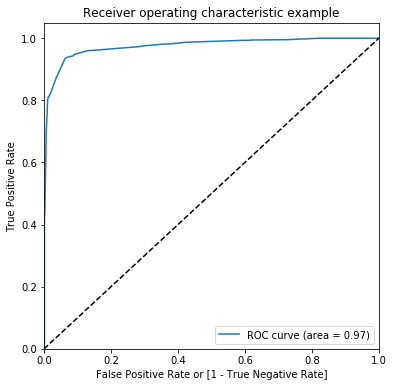

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00120337, 0.00120337, 0.00120337,
        0.00120337, 0.00120337, 0.00120337, 0.00120337, 0.00120337,
        0.00120337, 0.00120337, 0.00240674, 0.00240674, 0.00601685,
        0.00601685, 0.00601685, 0.00601685, 0.00601685, 0.00902527,
        0.01083032, 0.01143201, 0.01865223, 0.0198556 , 0.03730445,
        0.03790614, 0.05716005, 0.05776173, 0.0631769 , 0.07220217,
        0.08784597, 0.08904934, 0.12755716, 0.12815884, 0.28820698,
        0.28941035, 0.29663057, 0.35800241, 0.37304452, 0.4253911 ,
        0.42839952, 0.59566787, 0.61131167, 0.6179302 , 0.61853189,
        0.71419976, 0.71901324, 0.72262335, 0.82611312, 0.84175692,
        0.8423586 , 0.8898917 , 0.92839952, 0.93020457, 0.93983153,
        0.99097473, 0.99157641, 0.99518652, 0.99939832, 1.        ]),
 array([0.00000000e+00, 9.94035785e-04, 1.98807157e-03, 3.97614314e-03,
        4.97017893e-03, 6.95825050e-03, 7.

In [86]:
draw_roc(y_pred_final.Converted, y_pred_final.Convert_Prob)

In [87]:
# draw_roc(y_pred_final.Converted, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Convert_Prob))

'0.97'

#### We see an overall AUC score of 0.97 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [88]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(6224, 186)

In [89]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [90]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [91]:
pca.components_

array([[-2.49537918e-03,  1.19615492e-05,  1.00256831e-03, ...,
         3.88903623e-01,  2.75213788e-01,  1.78730175e-01],
       [ 3.26908114e-03, -3.73466149e-05, -1.04015869e-03, ...,
        -3.39392038e-01,  5.47690167e-01,  5.73972721e-01],
       [ 1.23576014e-02, -2.00600054e-04,  5.11409915e-04, ...,
         7.78203731e-02,  8.88607918e-02,  1.20862111e-01],
       ...,
       [-0.00000000e+00, -5.56969380e-16, -6.06097241e-17, ...,
         1.56125113e-16, -0.00000000e+00, -6.93889390e-17],
       [-0.00000000e+00,  1.53923723e-16,  1.10953144e-16, ...,
         6.24500451e-17, -1.66533454e-16, -1.24900090e-16],
       [ 0.00000000e+00,  2.67201625e-16, -2.76723482e-16, ...,
         2.77555756e-17, -1.38777878e-17,  1.24900090e-16]])

In [92]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-2.495379e-03,3.269081e-03,Do Not Email
1,1.196155e-05,-3.734661e-05,Do Not Call
2,1.002568e-03,-1.040159e-03,Search
3,-0.000000e+00,-1.804112e-16,Magazine
4,-1.665335e-16,-3.330669e-16,Newspaper Article


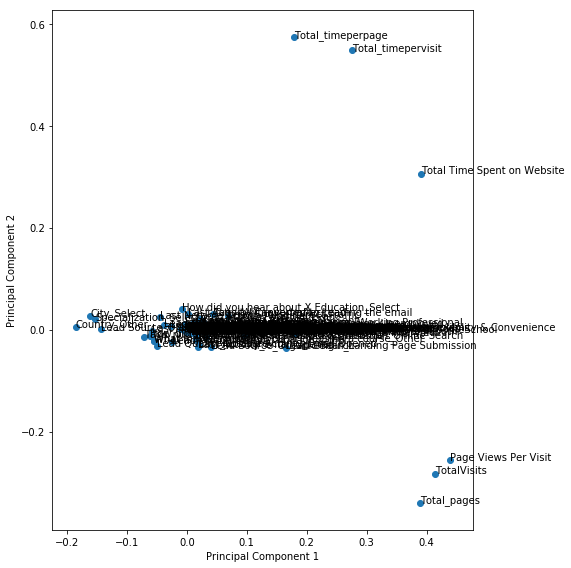

In [93]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [94]:
pca.explained_variance_ratio_

array([2.53238735e-01, 1.89854709e-01, 9.22838171e-02, 4.83936030e-02,
       4.26490414e-02, 3.72736595e-02, 2.94883187e-02, 2.89529570e-02,
       2.30115500e-02, 1.97076388e-02, 1.52790843e-02, 1.30930601e-02,
       1.04357640e-02, 9.03492466e-03, 8.58008955e-03, 7.65007012e-03,
       7.59562844e-03, 7.44518847e-03, 7.32520823e-03, 6.74441962e-03,
       6.37062151e-03, 6.06980575e-03, 5.55936358e-03, 5.49855471e-03,
       5.27743765e-03, 5.11979878e-03, 4.67960019e-03, 4.44657983e-03,
       4.39756751e-03, 4.21096192e-03, 3.91717675e-03, 3.78796339e-03,
       3.62314802e-03, 3.37172705e-03, 3.29284063e-03, 3.12961743e-03,
       3.05340116e-03, 2.97221057e-03, 2.82864680e-03, 2.68185685e-03,
       2.63531176e-03, 2.49079375e-03, 2.39159351e-03, 2.29200206e-03,
       2.17865404e-03, 2.02727431e-03, 1.93059479e-03, 1.82399465e-03,
       1.71900653e-03, 1.69722668e-03, 1.65098516e-03, 1.54123938e-03,
       1.53357603e-03, 1.46665369e-03, 1.45329606e-03, 1.41774207e-03,
      

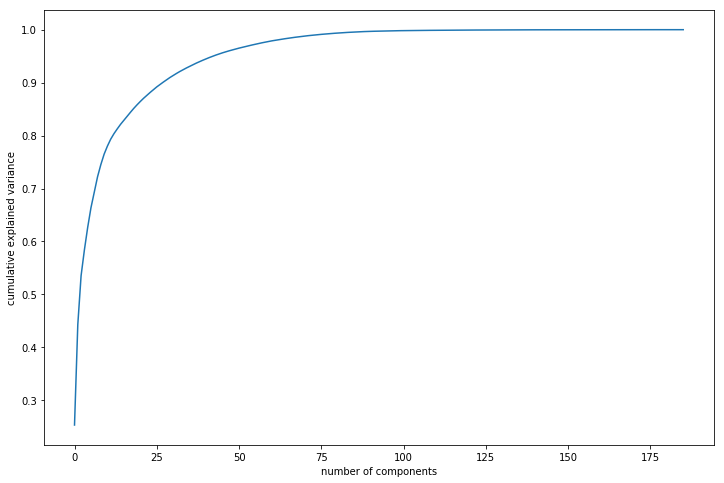

In [95]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 40 components are enough to describe 90% of the variance in the dataset
- We'll choose 40 components for our modeling

In [96]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

#### Basis transformation - getting the data onto our PCs

In [97]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(6224, 40)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [98]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

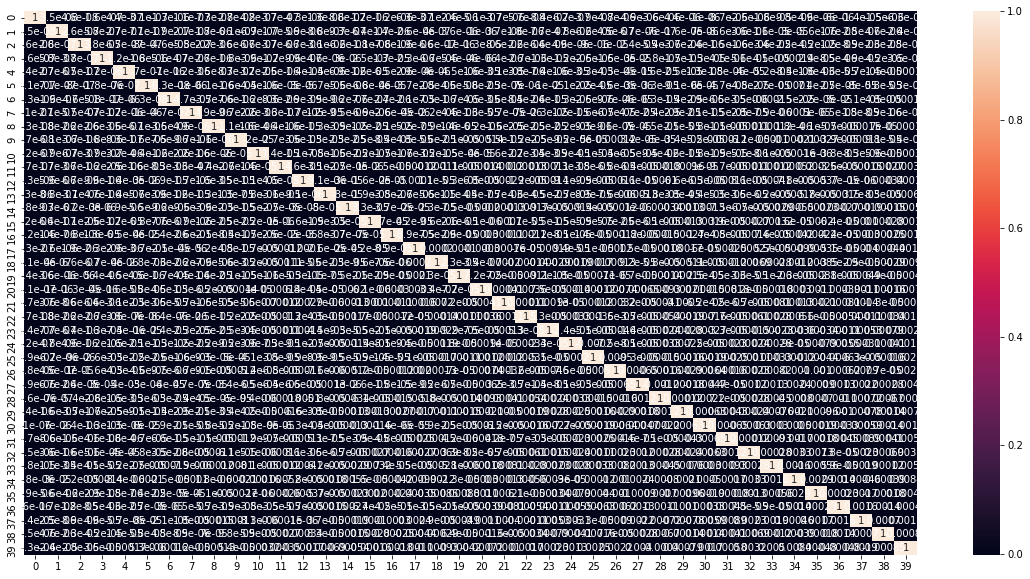

In [99]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [100]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008388685846546014 , min corr:  -0.002105575251547053


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [101]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2668, 40)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any important information

In [102]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

In [103]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.96'

#### Impressive! The similar result, without all the hard work on feature selection!

Why not take it a step further and get a little more 'unsupervised' in our approach?
This time, we'll let PCA select the number of components basen on a variance cutoff we provide

In [104]:
pca_again = PCA(0.9)

In [105]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 44 components

(6224, 28)

In [106]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2668, 28)

In [108]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.96'

#### So there it is - a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.

#### Before closing, let's also visualize the data to see if we can spot any patterns

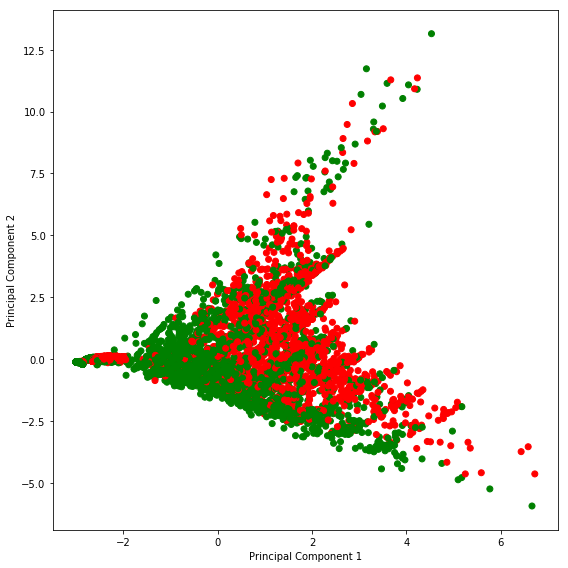

In [109]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Looks like there is a good amount of separation in 2D, but probably not enough

Let's look at it in 3D, and we expect spread to be better (dimensions of variance, remember?)

#### So let's try building the model with just 10 principal components!






In [110]:
pca_last = PCA(n_components=10)
df_train_pca10 = pca_last.fit_transform(X_train)
df_test_pca10 = pca_last.transform(X_test)
df_test_pca10.shape

(2668, 10)

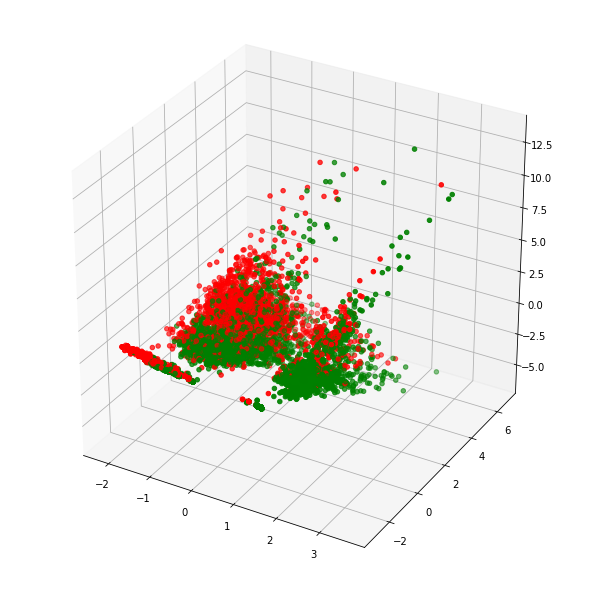

In [111]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

In [112]:
#training the regression model
learner_pca10 = LogisticRegression()
model_pca10 = learner_pca10.fit(df_train_pca10,y_train)
#Making prediction on the test data
pred_probs_test10 = model_pca10.predict_proba(df_test_pca10)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test10))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'0.92'

### SO the AUC with RFE is 0.97
### with PCA we have a very similar score of 0.96 without much effort.
### With 10 Pricipal components we have a score of 0.92. So the model is very good.